In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/fetal_health (1).csv')

In [ ]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [ ]:
df.shape

(2126, 22)

In [ ]:
X = pd.DataFrame(df.iloc[:,:-1])

In [ ]:
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [ ]:
Y = pd.DataFrame(df.iloc[:,-1:])

In [ ]:
Y

,fetal_health
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
2121,2.0
2122,2.0
2123,2.0
2124,2.0


In [ ]:
result=pd.DataFrame(columns=['Classifier_name','Score','Time_Taken','Accuracy Score'])
result

,Classifier_name,Score,Time_Taken,Accuracy Score


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9150cac70>,
      dtype=object)

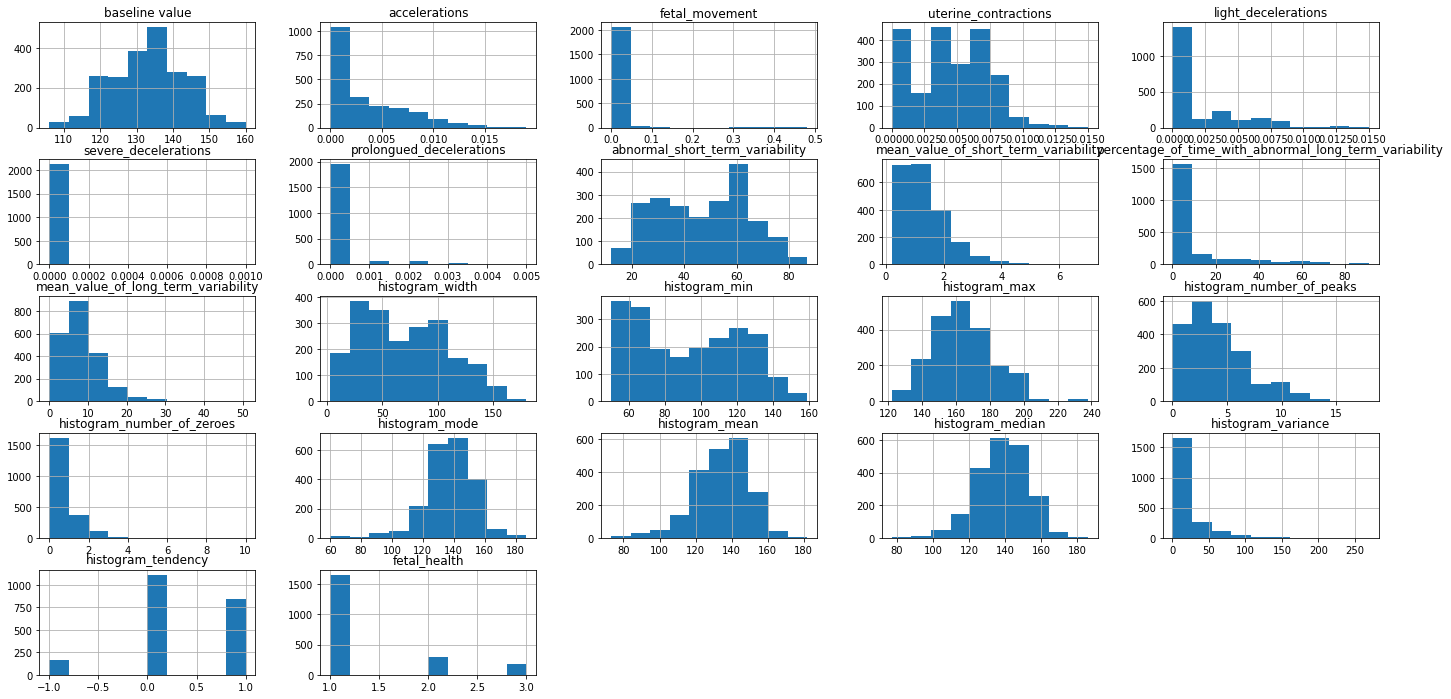

In [ ]:
plt.rcParams["figure.figsize"] = (24, 12)
df.hist()

In [ ]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [ ]:
print(df.duplicated().value_counts()) 

False    2113
True       13
dtype: int64


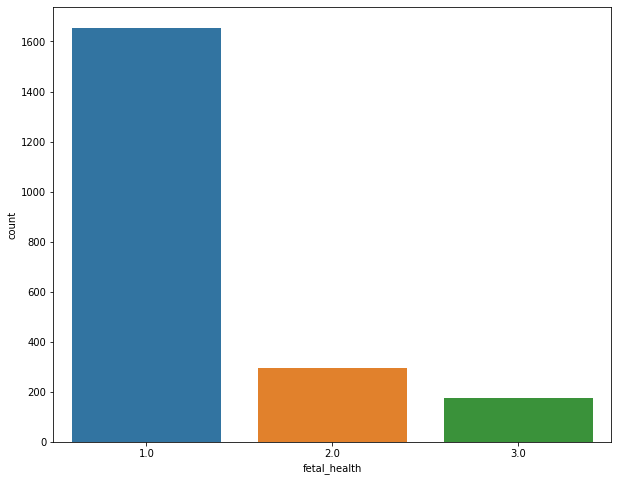

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 8)
df['fetal_health'].value_counts()
sns.countplot(x='fetal_health', data=df)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)
X_class_train, X_test, y_class_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_class_train.columns
data_X, data_y = os.fit_resample(X_class_train, y_class_train)
smoted_X = pd.DataFrame(data=data_X,columns=columns )
smoted_y= pd.DataFrame(data=data_y,columns=['fetal_health'])
X = smoted_X
Y = smoted_y

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=1, test_size=0.2)

In [ ]:
sc_X = StandardScaler()
sc_X.fit(X_train)
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [ ]:
columns_value_new=X_train.columns
test_X_Scaled_Except = pd.DataFrame(X_trainscaled, columns=columns_value_new)

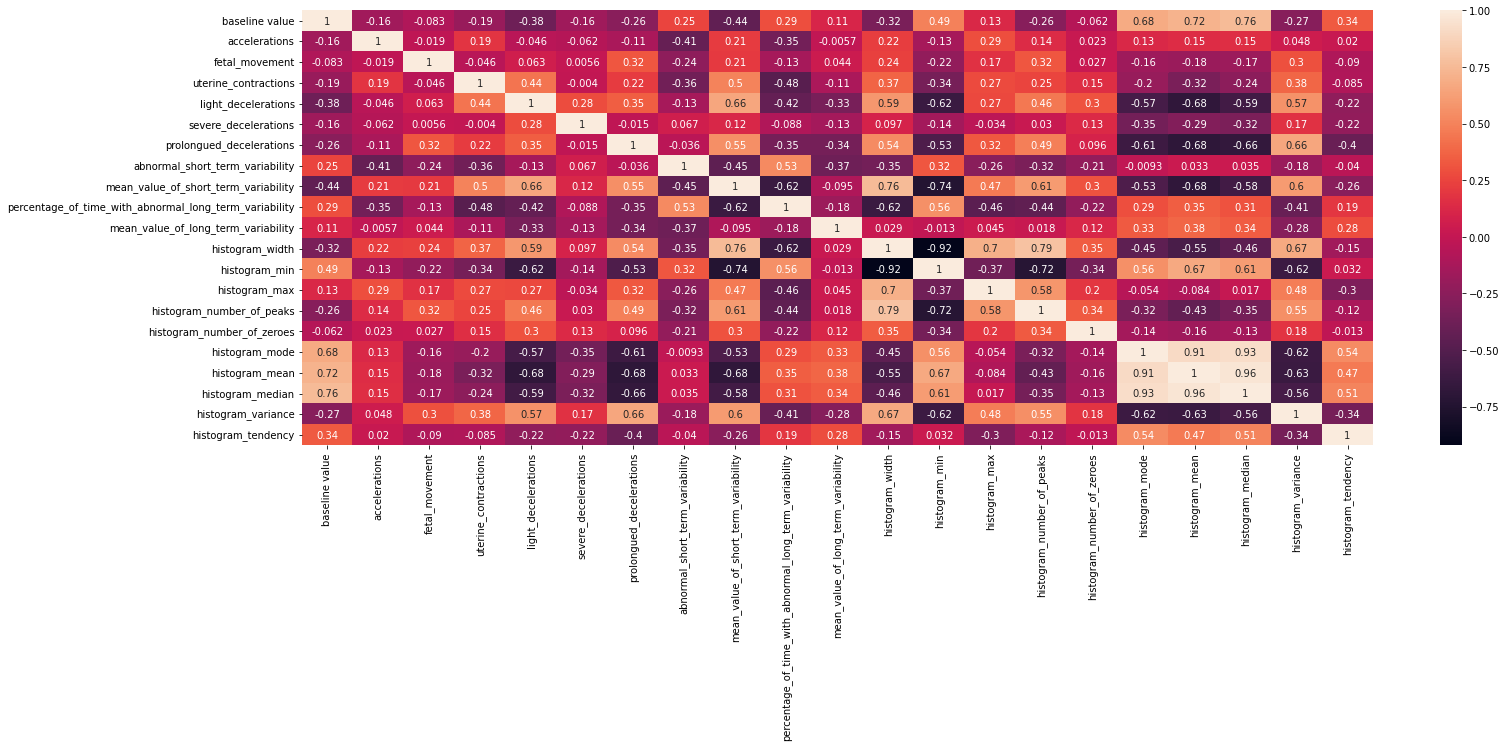

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (24, 8)
sns.heatmap(test_X_Scaled_Except.corr(),annot=True);

In [ ]:
from sklearn.decomposition import PCA
PCA_data_train =X_trainscaled
PCA_data_test =X_testscaled
pca = PCA(n_components=15)
pca.fit(PCA_data_train)
X_pca_train= pca.fit_transform(PCA_data_train) 
X_pca_test= pca.fit_transform(PCA_data_test) 
principalDf_train = pd.DataFrame(data = X_pca_train)
principalDf_test = pd.DataFrame(data = X_pca_test)

In [ ]:
principalDf_train.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.722684,1.837458,-0.657690,1.297968,3.375318,0.268366,-0.680766,0.071785,3.157986,-0.637906,0.391157,-0.231572,0.022808,0.078301,-0.477210
1,-2.817669,-0.296079,-0.944312,0.821080,0.351596,-0.261046,0.667759,0.141655,-0.337174,-0.146755,-0.176236,0.015142,-0.109940,-0.241524,0.302413
2,0.472250,2.019086,1.647190,1.697766,0.563264,0.678056,1.076190,-1.201217,1.582291,-1.470257,-0.042462,0.356089,1.004554,0.154545,-0.676494
3,-3.240092,-2.800915,-0.167650,0.593260,0.258840,-0.945778,1.308815,0.178683,0.688148,0.168205,0.645571,0.292505,-0.152486,0.430850,0.128961
4,-3.835422,0.144710,-1.021567,-0.722261,0.766525,-0.602992,-0.276216,1.264699,0.270672,0.042132,0.561379,0.300278,-0.548544,0.366154,-0.133816
5,5.773822,-1.710108,0.107411,-1.486931,-0.796770,-0.289155,0.383144,-1.560626,-0.245127,1.058001,-0.380646,-0.876282,-0.446665,0.677896,-0.143482
6,-2.464166,1.857997,-0.222034,-0.621934,-0.134774,0.401971,-0.834182,0.407771,-0.538021,-0.079682,-0.239544,0.121399,-0.228263,-0.395837,0.096197
7,-1.433604,2.316347,1.014593,-1.307785,-0.382377,-0.243003,0.710629,0.635536,-0.158556,-0.953967,-0.024473,-0.202769,0.205516,0.237899,-0.022143
8,-1.744394,2.341780,-1.056756,-2.033346,-0.203163,1.233863,0.530418,-0.542787,-0.627450,-0.393077,-0.345737,-0.867173,1.086241,0.640974,0.101708
9,-2.725829,1.963023,-0.221824,-0.678596,0.171221,0.052423,-1.105224,0.831289,-0.609516,-0.270650,-0.107569,-0.020934,-0.162345,-0.267108,0.104867


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa90f769700>,
      dtype=object)

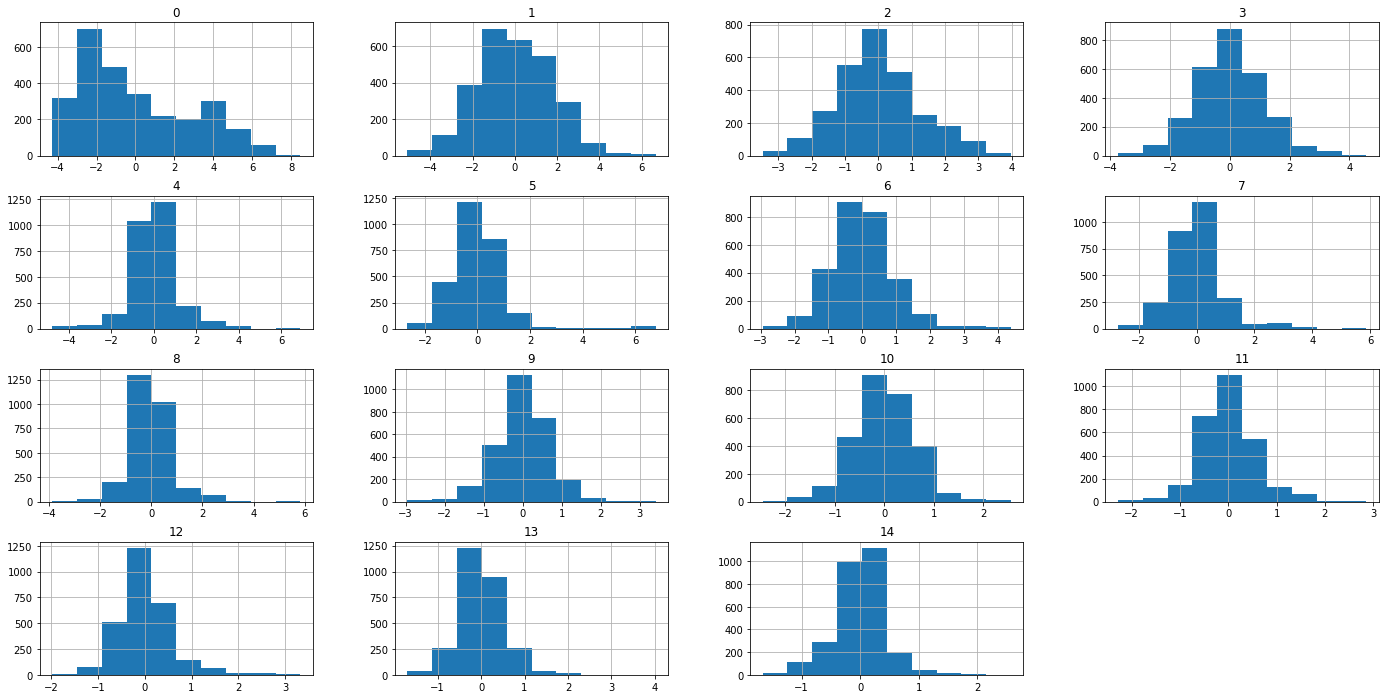

In [ ]:
plt.rcParams["figure.figsize"] = (24, 12)
principalDf_train.hist()

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_naiveBayes = GaussianNB().fit(X_trainscaled, y_train)
nb_pred = clf_naiveBayes.predict(X_testscaled)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, nb_pred))

0.8048780487804879


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

         1.0       0.91      0.84      0.87       240
         2.0       0.68      0.92      0.78       236
         3.0       0.92      0.64      0.75       221

    accuracy                           0.80       697
   macro avg       0.84      0.80      0.80       697
weighted avg       0.83      0.80      0.80       697



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


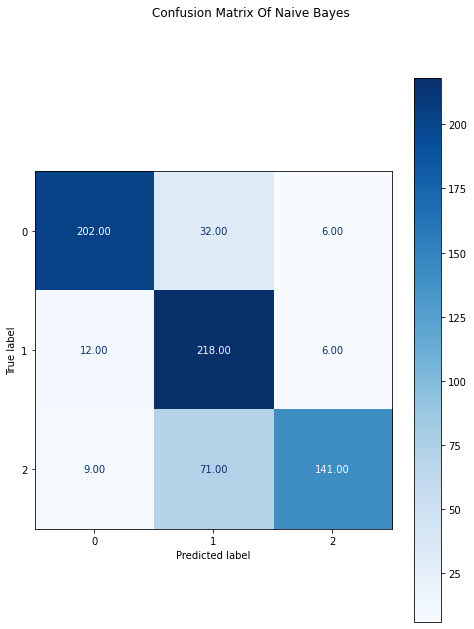

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(clf_naiveBayes, X_testscaled, y_test,display_labels=["0",'1','2'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix Of Naive Bayes")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=0).fit(X_trainscaled, y_train)
dt_pred = clf_dt.predict(X_testscaled)

In [ ]:
print(accuracy_score(y_test, dt_pred))

0.9497847919655668


In [ ]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

         1.0       0.94      0.93      0.94       240
         2.0       0.93      0.94      0.93       236
         3.0       0.98      0.99      0.98       221

    accuracy                           0.95       697
   macro avg       0.95      0.95      0.95       697
weighted avg       0.95      0.95      0.95       697



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


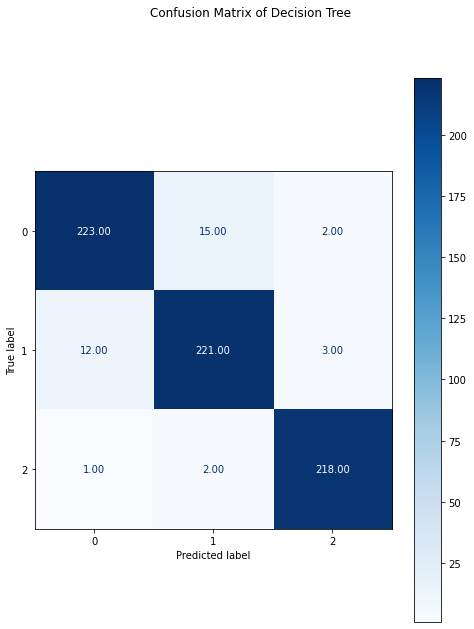

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(clf_dt, X_testscaled, y_test,display_labels=["0",'1','2'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix of Decision Tree")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=20, random_state=0).fit(X_trainscaled, y_train)
rf_pred = clf_rf.predict(X_testscaled)

<ipython-input-31-679f32003825>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf = RandomForestClassifier(max_depth=20, random_state=0).fit(X_trainscaled, y_train)


In [ ]:
print(accuracy_score(y_test, rf_pred))

0.9784791965566715


In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         1.0       0.99      0.96      0.97       240
         2.0       0.95      0.98      0.97       236
         3.0       0.99      1.00      0.99       221

    accuracy                           0.98       697
   macro avg       0.98      0.98      0.98       697
weighted avg       0.98      0.98      0.98       697



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


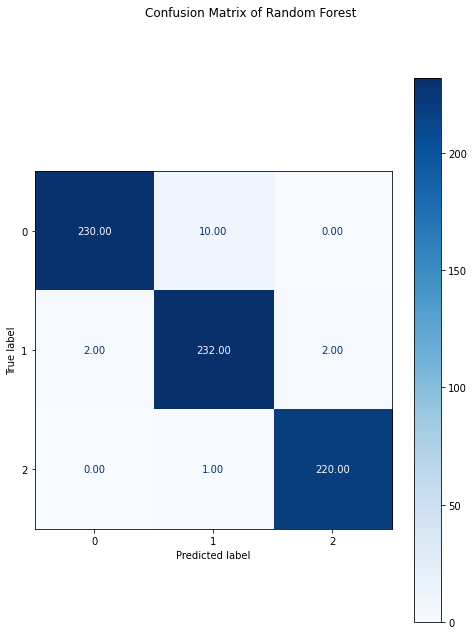

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(clf_rf, X_testscaled, y_test,display_labels=["0",'1','2'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix of Random Forest")
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_naiveBayes = GaussianNB().fit(principalDf_train, y_train)
nb_pred = clf_naiveBayes.predict(principalDf_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, nb_pred))

0.629842180774749


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

         1.0       0.59      0.38      0.46       240
         2.0       0.59      0.84      0.69       236
         3.0       0.74      0.67      0.70       221

    accuracy                           0.63       697
   macro avg       0.64      0.63      0.62       697
weighted avg       0.63      0.63      0.62       697



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


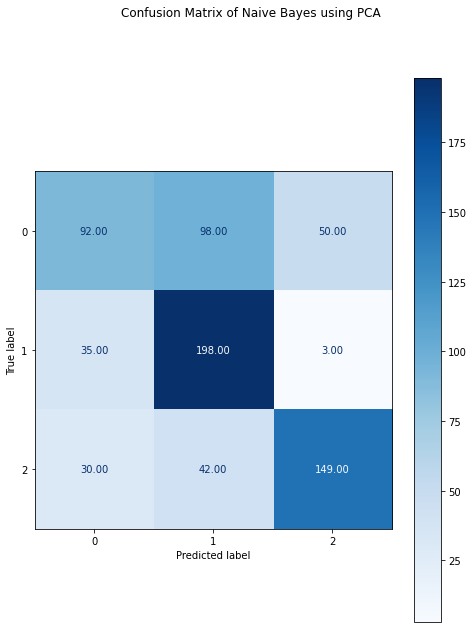

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(clf_naiveBayes, principalDf_test, y_test,display_labels=["0",'1','2'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix of Naive Bayes using PCA")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=0).fit(principalDf_train, y_train)
dt_pred = clf_dt.predict(principalDf_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, dt_pred))

0.5222381635581061


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

         1.0       0.47      0.37      0.41       240
         2.0       0.45      0.62      0.52       236
         3.0       0.72      0.59      0.65       221

    accuracy                           0.52       697
   macro avg       0.54      0.52      0.53       697
weighted avg       0.54      0.52      0.52       697



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


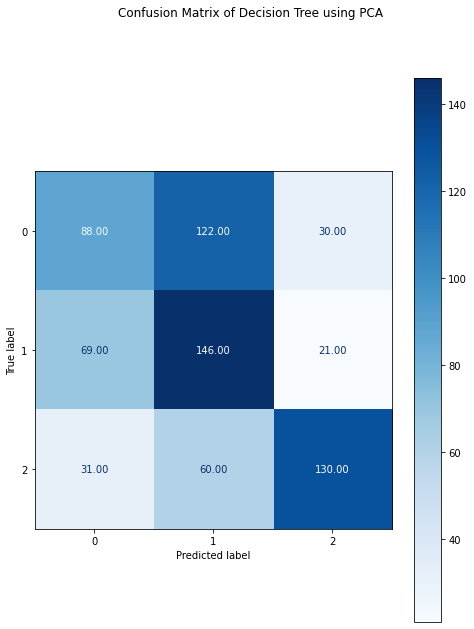

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(clf_dt, principalDf_test, y_test,display_labels=["0",'1','2'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix of Decision Tree using PCA")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=20, random_state=0).fit(principalDf_train, y_train)
rf_pred = clf_rf.predict(principalDf_test)

<ipython-input-43-129148d84730>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf = RandomForestClassifier(max_depth=20, random_state=0).fit(principalDf_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, rf_pred))

0.5365853658536586


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         1.0       0.39      0.51      0.44       240
         2.0       0.48      0.41      0.44       236
         3.0       0.88      0.70      0.78       221

    accuracy                           0.54       697
   macro avg       0.58      0.54      0.55       697
weighted avg       0.57      0.54      0.55       697



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


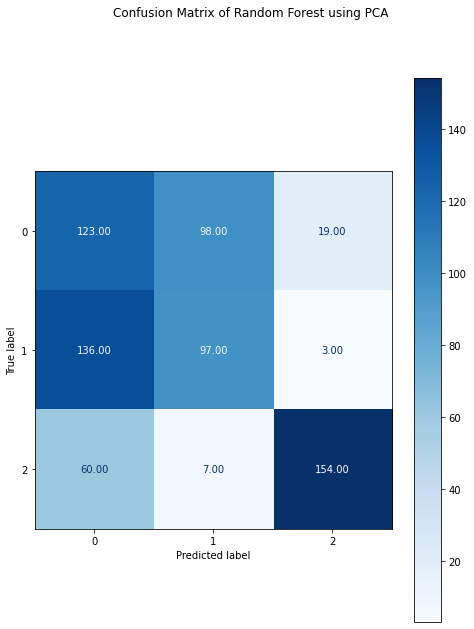

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(clf_rf, principalDf_test, y_test,display_labels=["0",'1','2'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix of Random Forest using PCA")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time
neighbour = KNeighborsClassifier(n_neighbors=3)
start=time.time()
neighbour.fit(X,Y)
score=neighbour.score(X_train,y_train)
print('KNN Score:',score)
stop=time.time()
time_taken=stop-start
print('Time for Training:',time_taken)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Score: 0.9802584350323044
Time for Training: 0.5015568733215332


In [ ]:
pred=neighbour.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print("Accuracy score : ",accuracy)

Accuracy score :  0.9856527977044476


In [ ]:
li=['KNN Classifier',score,time_taken,accuracy]
li

['KNN Classifier', 0.9802584350323044, 0.5015568733215332, 0.9856527977044476]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       1.00      0.96      0.98       240
         2.0       0.97      1.00      0.98       236
         3.0       0.99      1.00      1.00       221

    accuracy                           0.99       697
   macro avg       0.99      0.99      0.99       697
weighted avg       0.99      0.99      0.99       697



In [ ]:
from sklearn import svm
clf=svm.SVC()
clf_tr=clf.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
clf=svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
start=time.time()
clf.fit(X_test,y_test)
score=clf.score(X_train,y_train)
print('SVM Score for linear kernal:',score)
stop=time.time()
time_taken=stop-start
print('Time for Training:',time_taken)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Score for linear kernal: 0.8549892318736539
Time for Training: 0.6661262512207031


In [ ]:
pred=neighbour.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print("Accuracy score : ",accuracy)

Accuracy score :  0.9856527977044476


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


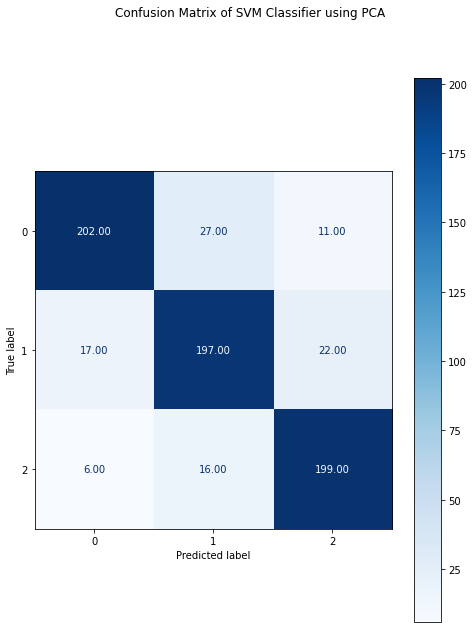

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(clf_tr, X_test, y_test,display_labels=["0",'1','2'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix of SVM Classifier using PCA")
plt.show()

In [ ]:
li=['SVM classifier',score,time_taken,accuracy]
result.loc[len(li)]=li
result

,Classifier_name,Score,Time_Taken,Accuracy Score
4,SVM classifier,0.854989,0.666126,0.985653


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       1.00      0.96      0.98       240
         2.0       0.97      1.00      0.98       236
         3.0       0.99      1.00      1.00       221

    accuracy                           0.99       697
   macro avg       0.99      0.99      0.99       697
weighted avg       0.99      0.99      0.99       697



In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
start=time.time()
mlp_tr=mlp.fit(X_train,y_train)
print('MLP Score:',mlp.score(X_train,y_train))
stop=time.time()
print('Time for Training:',stop-start)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLP Score: 0.9210337401292176
Time for Training: 2.662407398223877


In [ ]:
pred=mlp.predict(X_test)
print("Accuracy score : ",accuracy_score(y_test,pred))

Accuracy score :  0.9182209469153515


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.94      0.85      0.89       240
         2.0       0.87      0.94      0.90       236
         3.0       0.95      0.98      0.96       221

    accuracy                           0.92       697
   macro avg       0.92      0.92      0.92       697
weighted avg       0.92      0.92      0.92       697



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


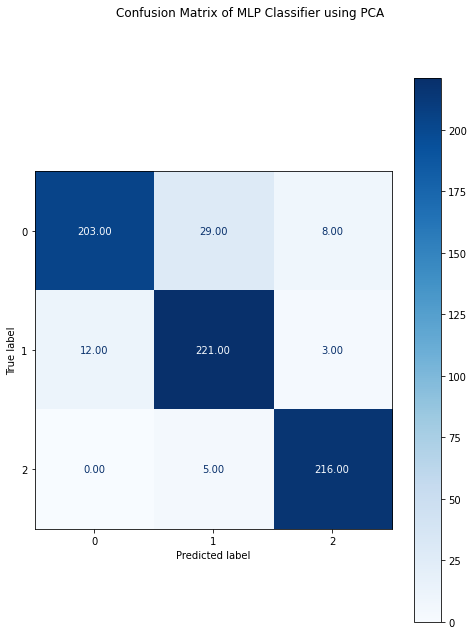

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(mlp_tr, X_test, y_test,display_labels=["0",'1','2'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix of MLP Classifier using PCA")
plt.show()

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
print('Tree Graph Classifier Score : ',model.score(X_test,y_test))

Tree Graph Classifier Score :  0.9526542324246772


In [ ]:
pred=model.predict(X_test)
print("Accuracy score : ",accuracy_score(y_test,pred))

Accuracy score :  0.9526542324246772


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.96      0.92      0.94       240
         2.0       0.92      0.95      0.94       236
         3.0       0.98      0.99      0.98       221

    accuracy                           0.95       697
   macro avg       0.95      0.95      0.95       697
weighted avg       0.95      0.95      0.95       697



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


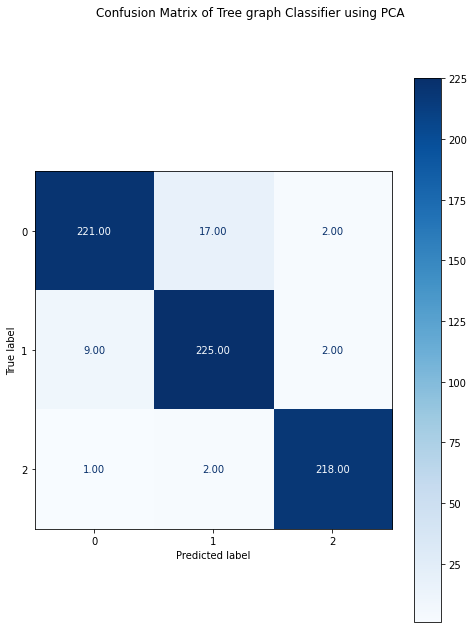

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(model, X_test, y_test,display_labels=["0",'1','2'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix of Tree graph Classifier using PCA")
plt.show()

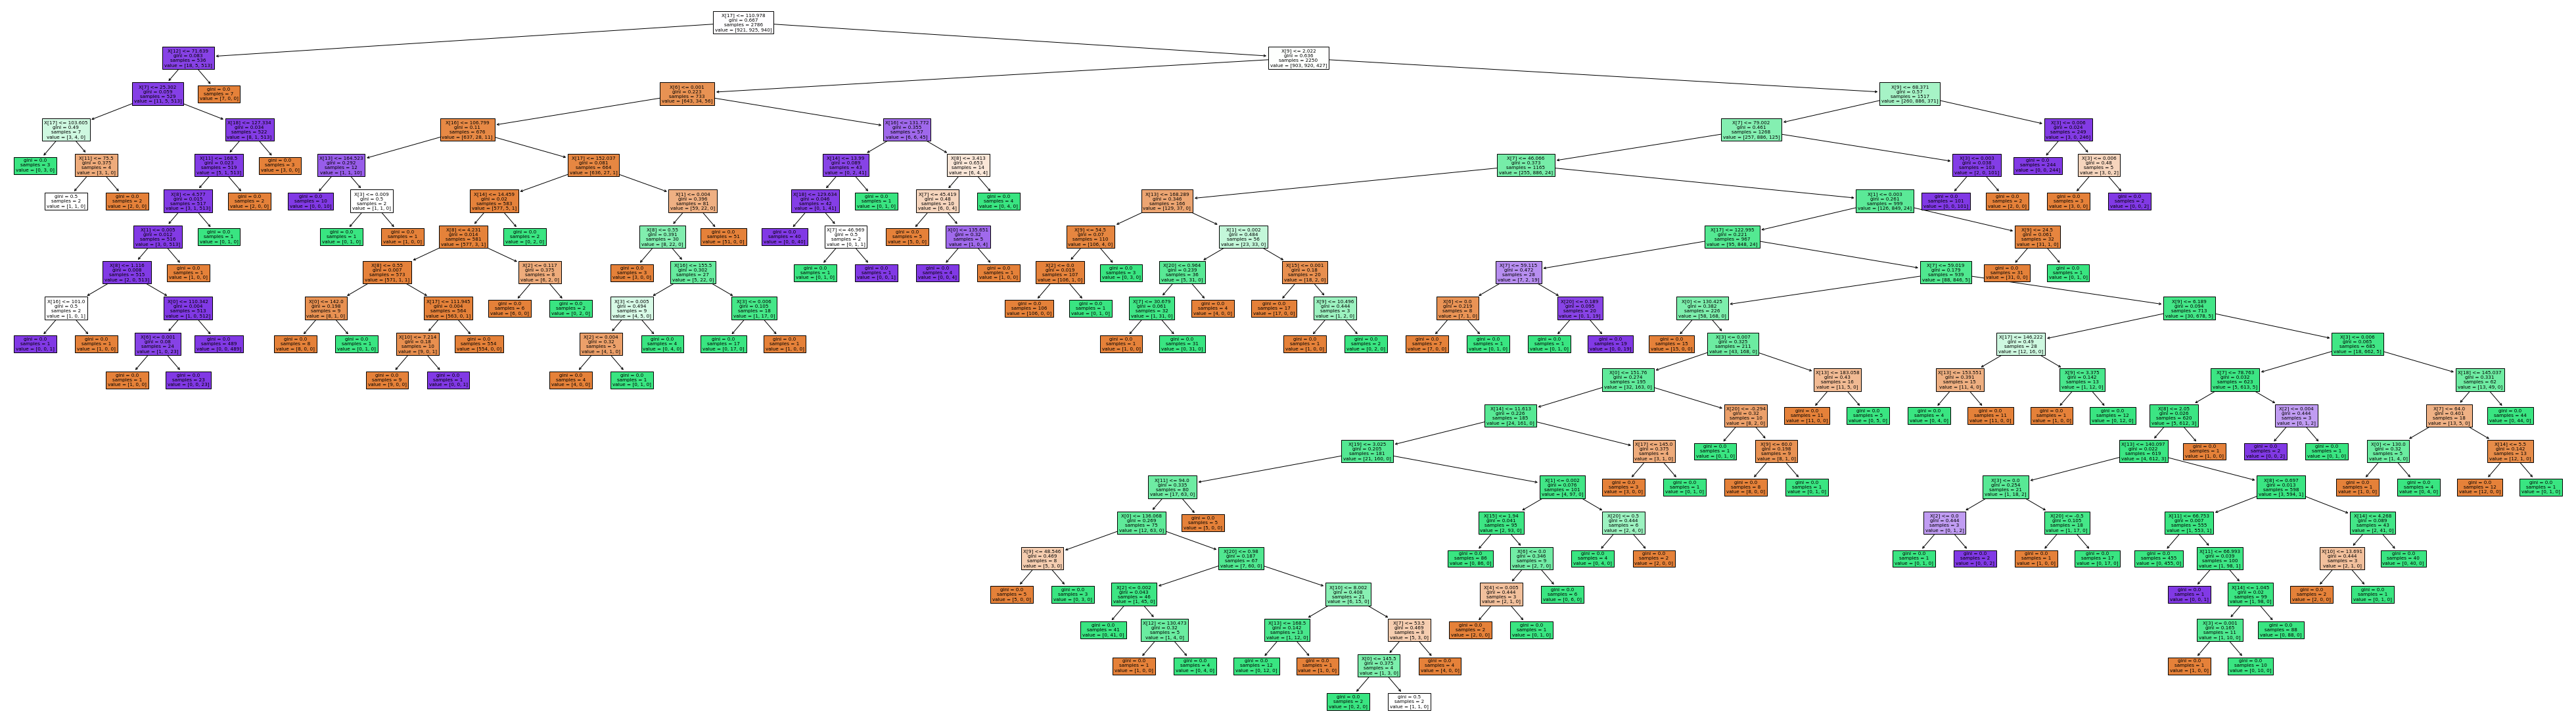

In [ ]:
plt.figure(figsize=(70,20))
tree.plot_tree(model, filled=True)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
start=time.time()
model = GaussianNB()
nb_tr=model.fit(X_train,y_train)
print("GausianNB score:",model.score(X_train,y_train))
stop=time.time()
print('Time for Training:',stop-start)

GausianNB score: 0.7742282842785355
Time for Training: 0.02091193199157715


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pred=model.predict(X_test)
print("Accuracy score : ",accuracy_score(y_test,pred))

Accuracy score :  0.787661406025825


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.90      0.75      0.82       240
         2.0       0.69      0.90      0.78       236
         3.0       0.83      0.71      0.76       221

    accuracy                           0.79       697
   macro avg       0.81      0.79      0.79       697
weighted avg       0.81      0.79      0.79       697



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


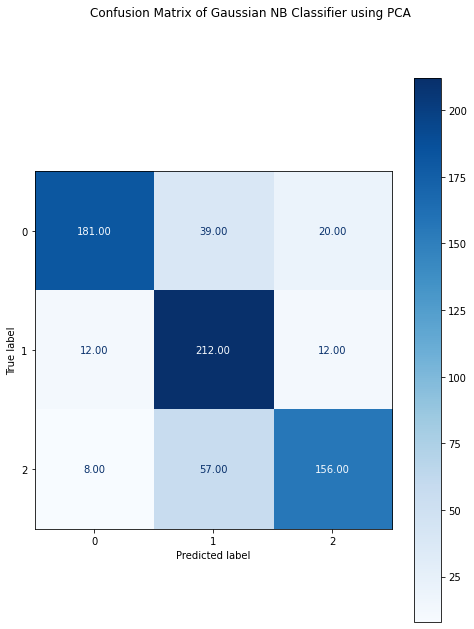

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(nb_tr, X_test, y_test,display_labels=["0",'1','2'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix of Gaussian NB Classifier using PCA")
plt.show()

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg=linear_model.LinearRegression()
start=time.time()
reg.fit(X_train,y_train)
print("Linear Regression score : ",reg.score(X_train,y_train))
stop=time.time()
print("Time taken : ",stop-start)

Linear Regression score :  0.7276171289709461
Time taken :  0.03114771842956543


In [ ]:
pred=reg.predict(X_test)

In [ ]:
print("r2 score : ",r2_score(y_test,pred))

r2 score :  0.7248221300503965


In [ ]:
print("Mean square root : ",mean_squared_error(y_test,pred))

Mean square root :  0.18179981932723543


In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)
start=time.time()
log.fit(X_train,y_train)
print("Logistic Regressor score : ",log.score(X_train,y_train))
stop=time.time()
print("Time taken : ",stop-start)

Logistic Regressor score :  0.8033022254127782
Time taken :  0.16750431060791016


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
log.predict(X_test)

array([2., 1., 1., 3., 1., 3., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2.,
       1., 3., 2., 3., 3., 2., 1., 3., 3., 2., 3., 2., 1., 2., 2., 1., 3.,
       1., 1., 3., 3., 1., 3., 3., 3., 1., 3., 1., 2., 3., 3., 2., 3., 1.,
       2., 2., 1., 2., 1., 2., 1., 3., 2., 2., 2., 1., 3., 2., 3., 2., 1.,
       2., 3., 2., 2., 2., 1., 1., 1., 3., 2., 1., 2., 1., 2., 1., 2., 2.,
       2., 1., 2., 1., 3., 3., 2., 2., 2., 2., 1., 2., 1., 1., 2., 3., 1.,
       1., 1., 1., 3., 3., 2., 2., 2., 3., 2., 2., 3., 1., 1., 2., 1., 3.,
       3., 1., 2., 2., 1., 2., 1., 1., 1., 3., 1., 1., 2., 2., 1., 2., 1.,
       1., 3., 3., 2., 1., 3., 1., 2., 3., 3., 2., 2., 3., 1., 1., 2., 3.,
       2., 3., 1., 2., 3., 2., 1., 3., 1., 2., 3., 3., 2., 1., 1., 1., 3.,
       1., 1., 2., 1., 2., 1., 1., 2., 3., 3., 1., 2., 1., 1., 2., 1., 1.,
       2., 3., 1., 1., 2., 1., 1., 1., 1., 3., 2., 3., 2., 3., 1., 1., 1.,
       1., 3., 2., 3., 2., 1., 1., 2., 2., 3., 3., 1., 3., 1., 2., 3., 2.,
       2., 2., 3., 3., 2.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


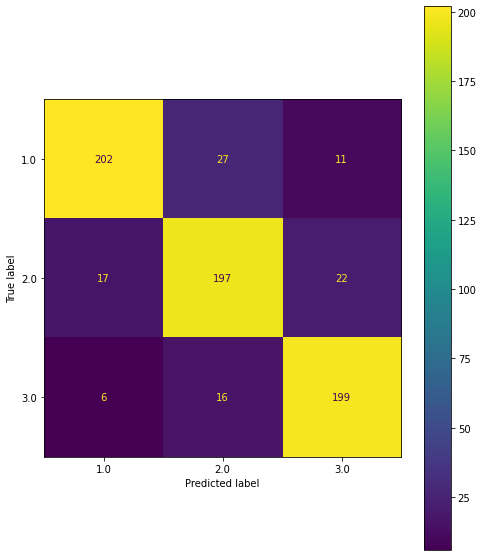

In [ ]:
clf=SVC(random_state=0)
clf.fit(X_train,y_train)
prediction=clf.predict(X_test)
cm = confusion_matrix(y_test, prediction, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import f1_score
start=time.time()
print("F1 score : ",f1_score(y_test, prediction, average='macro'))
stop=time.time()
print("Time taken : ",stop-start)

F1 score :  0.8583784977353471
Time taken :  0.003719329833984375


In [ ]:
from sklearn.metrics import f1_score
start=time.time()
print("F1 score : ",f1_score(y_test, prediction, average='micro'))
stop=time.time()
print("Time taken : ",stop-start)

F1 score :  0.8579626972740315
Time taken :  0.0042493343353271484


In [ ]:
from sklearn.metrics import f1_score
start=time.time()
print("F1 score : ",f1_score(y_test, prediction, average='weighted'))
stop=time.time()
print("Time taken : ",stop-start)

F1 score :  0.8580034967959973
Time taken :  0.004473686218261719


In [ ]:
from sklearn.metrics import jaccard_score
start=time.time()
print("Jaccard score : ",jaccard_score(y_test, prediction, average='macro'))
stop=time.time()
print("Time taken : ",stop-start)

Jaccard score :  0.752539531131731
Time taken :  0.0034101009368896484


In [ ]:
from sklearn.metrics import jaccard_score
start=time.time()
print("Jaccard score : ",jaccard_score(y_test, prediction, average='micro'))
stop=time.time()
print("Time taken : ",stop-start)

Jaccard score :  0.7512562814070352
Time taken :  0.0028269290924072266


In [ ]:
from sklearn.metrics import jaccard_score
start=time.time()
print("Jaccard score : ",jaccard_score(y_test, prediction, average='weighted'))
stop=time.time()
print("Time taken : ",stop-start)

Jaccard score :  0.7519630744380719
Time taken :  0.003615856170654297


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier(max_depth=2, random_state=0)
start=time.time()
re_tr=rfr.fit(X_train,y_train)
print("Logistic Regressor score : ",rfr.score(X_train,y_train))
stop=time.time()
print("Time taken : ",stop-start)

<ipython-input-90-4586b2046c7b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  re_tr=rfr.fit(X_train,y_train)


Logistic Regressor score :  0.8460157932519742
Time taken :  0.7760031223297119


In [ ]:
pred=rfr.predict(X_test)
print("Accuracy score : ",accuracy_score(y_test,pred))

Accuracy score :  0.8436154949784792


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.92      0.82      0.87       240
         2.0       0.76      0.91      0.82       236
         3.0       0.89      0.80      0.84       221

    accuracy                           0.84       697
   macro avg       0.85      0.84      0.84       697
weighted avg       0.85      0.84      0.84       697



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


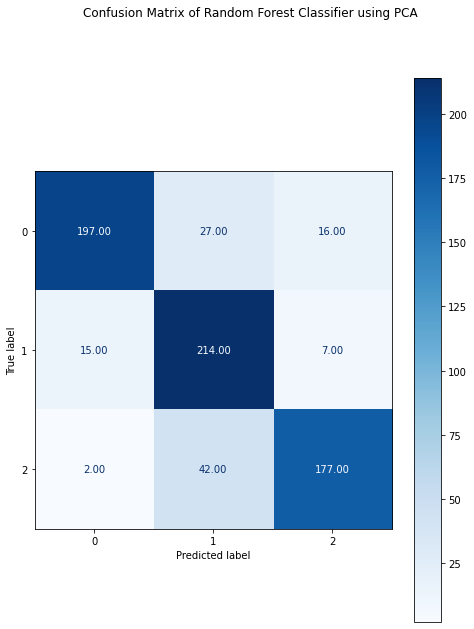

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(re_tr, X_test, y_test,display_labels=["0",'1','2'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix of Random Forest Classifier using PCA")
plt.show()